## Setup and Get Data

### 1.1 Install Dependencies and Setup

In [1]:
#!pip install labelme tensorflow opencv-python matplotlib albumentations

### 1.2 Collect Images Using OpenCv Lib

In [2]:
import os
import time
import uuid
import cv2

In [3]:
IMAGE_PATH = os.path.join('data', 'images')
number_images = 30

In [10]:
cap = cv2.VideoCapture(0)
for img_num in range(number_images):
    print(f'Collecting image {img_num}')
    ret, frame = cap.read()
    imgname = os.path.join(IMAGE_PATH, f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe Lib

In [15]:
!labelme

2024-05-22 13:28:50,634 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Windows 11\.labelmerc
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Drop Shadow Solo" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extrude A Shadow" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extrude B Solo" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extrude C Solo" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Drop Shadow" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extras Set A" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extras Set B" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extrude A" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extrude B" '
qt.qpa.fonts: Unable to enumerate family ' "FONTSPRING DEMO - Burford Extrude C" '
qt.qpa.fonts: Unable to

## 2. Review Dataset and Build Image Loading Function

#### 2.1 Importing packeges

In [5]:
import tensorflow as tf
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

#### 2.2 Limit GPU Memory (if you had)

In [20]:
# Avoid from GPU Memory error
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [22]:
tf.config.list_physical_devices('GPU')

[]

#### 2.3 Load Image Data with TF

In [134]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle = False)

In [5]:
def load_image(images):
    byte_img = tf.io.read_file(images)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [56]:
images.as_numpy_iterator().next()

array([[[ 71,  44,  25],
        [ 71,  44,  25],
        [ 72,  45,  28],
        ...,
        [203, 217, 220],
        [196, 211, 218],
        [165, 180, 187]],

       [[ 72,  45,  26],
        [ 72,  45,  26],
        [ 73,  46,  29],
        ...,
        [202, 216, 219],
        [197, 212, 219],
        [166, 181, 188]],

       [[ 74,  47,  28],
        [ 74,  47,  28],
        [ 75,  48,  31],
        ...,
        [201, 215, 218],
        [196, 211, 218],
        [167, 182, 189]],

       ...,

       [[  3,   7,  10],
        [  3,   7,  10],
        [  2,   6,   9],
        ...,
        [ 28,  24,  21],
        [ 31,  27,  26],
        [ 18,  14,  13]],

       [[  3,   7,  10],
        [  2,   6,   9],
        [  2,   6,   9],
        ...,
        [ 36,  32,  29],
        [ 37,  33,  32],
        [ 11,   7,   6]],

       [[  3,   7,  10],
        [  2,   6,   9],
        [  1,   5,   8],
        ...,
        [ 31,  27,  24],
        [ 30,  26,  25],
        [ 37,  33,  32]]

In [55]:
images = images.map(load_image)

In [60]:
images_generator = images.batch(4).as_numpy_iterator()

In [61]:
plot_images = images_generator.next()
plot_images

array([[[[ 71,  44,  25],
         [ 71,  44,  25],
         [ 72,  45,  28],
         ...,
         [203, 217, 220],
         [196, 211, 218],
         [165, 180, 187]],

        [[ 72,  45,  26],
         [ 72,  45,  26],
         [ 73,  46,  29],
         ...,
         [202, 216, 219],
         [197, 212, 219],
         [166, 181, 188]],

        [[ 74,  47,  28],
         [ 74,  47,  28],
         [ 75,  48,  31],
         ...,
         [201, 215, 218],
         [196, 211, 218],
         [167, 182, 189]],

        ...,

        [[  3,   7,  10],
         [  3,   7,  10],
         [  2,   6,   9],
         ...,
         [ 28,  24,  21],
         [ 31,  27,  26],
         [ 18,  14,  13]],

        [[  3,   7,  10],
         [  2,   6,   9],
         [  2,   6,   9],
         ...,
         [ 36,  32,  29],
         [ 37,  33,  32],
         [ 11,   7,   6]],

        [[  3,   7,  10],
         [  2,   6,   9],
         [  1,   5,   8],
         ...,
         [ 31,  27,  24],
        

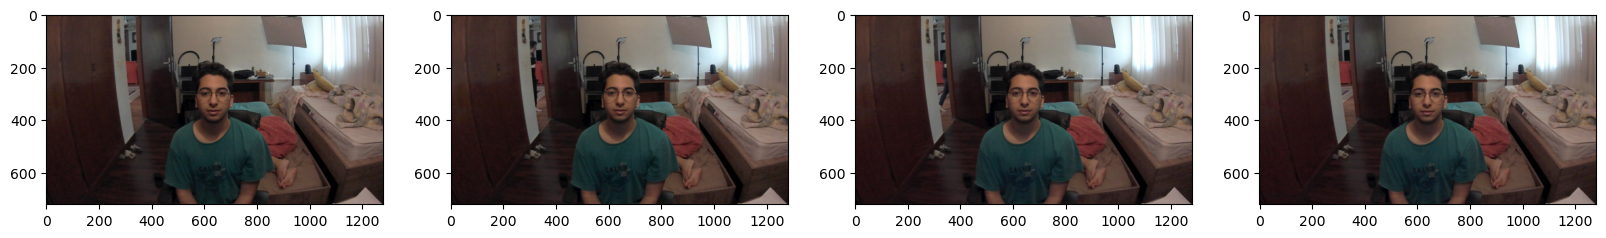

In [62]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

## 3. Partition Unaugmented Data

#### 3.1 MANUALLY SPLT SATA INTO TRAIN TEST AND CROSS VAL

In [64]:
90 *.7 # 63 to train

62.99999999999999

In [67]:
90 * .15 # 13 and 14 to test and cross validation

13.5

#### 3.2 Move the Matching Labels

In [68]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

## 4. Apply Image Augmentation On Images and Labels 

#### 4.1 Import Albumentations Packege

In [119]:
import albumentations as alb

In [120]:
augmentor = alb.Compose([
    alb.RandomCrop(width = 940, height = 450),
    alb.HorizontalFlip(p = 0.5),
    alb.RandomBrightnessContrast(p = 0.2),
    alb.RandomGamma(p = 0.2),
    alb.RGBShift(p = 0.2),
    alb.VerticalFlip(p = 0.5)],bbox_params = alb.BboxParams(format = 'albumentations', label_fields = ['class_labels']))

#### 4.2 Load a Test Image and Annotation with OpenCV and JSon

In [122]:
with open (os.path.join('data', 'train', 'labels', '113362e2-181a-11ef-be59-841b77d038e6.json'), 'r') as f:
    label = json.load(f)

In [121]:
img = cv2.imread(os.path.join('data', 'train', 'images', '113362e2-181a-11ef-be59-841b77d038e6.jpg')) #(720, 1280, 3)

In [123]:
label['shapes'][0]['points']

[[551.1999999999999, 185.6], [715.1999999999999, 418.40000000000003]]

#### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [124]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [125]:
coords

[551.1999999999999, 185.6, 715.1999999999999, 418.40000000000003]

In [126]:
coords = list(np.divide(coords, [1280, 720, 1280, 720]))

In [127]:
coords

[0.4306249999999999, 0.2577777777777778, 0.55875, 0.5811111111111111]

In [128]:
augmented = augmentor(image = img, bboxes = [coords], class_labels = ['face'])

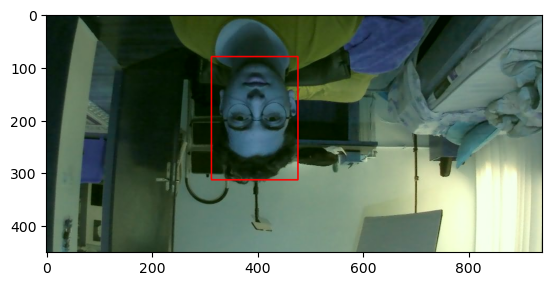

In [129]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [940,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [940,450]).astype(int)),
              (255, 0, 0), #b =255, g = 0, r = 0
              2)
plt.imshow(augmented['image'])

## 5. Build and Run Augmentation Pipeline

#### 5.1 Run Augmentation Pipeline

In [130]:
# This loop iterates over the different partitions of the dataset: training, testing, and validation.
for partition in ['train','test','val']: 

    # This loop iterates over each image file in the current partition's image directory.
    for image in os.listdir(os.path.join('data', partition, 'images')):
        
        # Reads the image using OpenCV
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        # Initializes the bounding box coordinates to a small default value to avoid empty bounding boxes.
        coords = [0,0,0.00001,0.00001]

        # Reads the JSON file corresponding to the image, extracts the bounding box coordinates, 
        # and normalizes them based on the image dimensions.
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1280, 720, 1280, 720]))

        # This loop performs 60 augmentations per image. 
        # It applies the augmentations using Albumentations, and saves the augmented images to a new directory.
        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                # Creates a new annotation dictionary for each augmented image, including the augmented bounding box coordinates and class label.
                # It then saves this annotation to a new JSON file.
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 
                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        # Catches and prints any exceptions that occur during the augmentation and saving process to avoid stopping the script.
        except Exception as e:
            print(e)

#### 5.2 Load Augmented Images to Tensorflow Dataset


In [6]:
# This line creates a dataset containing the file paths of all JPEG images in the specified directory.
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
# This maps the load_image function to each file path in the dataset, loading and decoding the images.
train_images = train_images.map(load_image)
# This resizes each image to 120x120 pixels.
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
# This normalizes the pixel values of each image to the range [0, 1].
train_images = train_images.map(lambda x: x/255)

In [7]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [8]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [9]:
train_images.as_numpy_iterator().next()

array([[[0.6596405 , 0.6406863 , 0.6338235 ],
        [0.7756128 , 0.7824755 , 0.79718137],
        [0.70902777, 0.7323529 , 0.7302696 ],
        ...,
        [0.24301521, 0.18745981, 0.18766402],
        [0.2932598 , 0.27046567, 0.28161764],
        [0.3561681 , 0.38754064, 0.39640492]],

       [[0.6439951 , 0.63210785, 0.62234473],
        [0.7870098 , 0.7848039 , 0.80355394],
        [0.6996323 , 0.72226304, 0.7149509 ],
        ...,
        [0.27524504, 0.20310466, 0.20290034],
        [0.27156863, 0.23272058, 0.23566176],
        [0.34456685, 0.3805149 , 0.38549834]],

       [[0.64754903, 0.63709146, 0.6230392 ],
        [0.7582108 , 0.7542892 , 0.77389705],
        [0.6895425 , 0.7055555 , 0.7173202 ],
        ...,
        [0.28280216, 0.20044924, 0.18933797],
        [0.28382352, 0.22598039, 0.22169118],
        [0.32712403, 0.36307207, 0.36405197]],

       ...,

       [[0.5029412 , 0.41666666, 0.36568627],
        [0.516299  , 0.4192402 , 0.37316176],
        [0.55371726, 0

## Prepare Labels

#### 6.1 Build Lavel

In [10]:
def load_labels(label_path):
    # label_path.numpy() converts the TensorFlow string tensor label_path to a NumPy string, which is necessary because open in Python expects a standard string.
    # Opens the JSON file specified by label_path in read mode with UTF-8 encoding.
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        
        # Reads the JSON content from the file and parses it into a Python dictionary.
        label = json.load(f)

    # Assumes the JSON file contains a dictionary with keys 'class' and 'bbox'.
    # Returns the class label as a list and the bounding box coordinates.
    return [label['class']], label['bbox'] 

#### 6.2 Load Labels to Tensorflow

In [11]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [12]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [13]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [14]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.5913, 0.397 , 0.7656, 0.914 ], dtype=float16))

## 7. Combine Label and Image 

#### 7.1 Check Partition Lengths

In [15]:
len(train_images), len(train_labels), len(val_images), len(val_labels), len(test_images), len(test_labels)

(3780, 3780, 840, 840, 780, 780)

#### 7.2 Create Final Datasets (Images/Labels)

In [16]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [17]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [18]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [19]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [20]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.816  , 0.     , 0.987  , 0.3555 ],
        [0.4385 , 0.4294 , 0.599  , 0.959  ],
        [0.5786 , 0.1729 , 0.71   , 0.562  ],
        [0.303  , 0.10535, 0.4885 , 0.6724 ],
        [0.4175 , 0.3875 , 0.5605 , 0.8213 ],
        [0.4258 , 0.1658 , 0.595  , 0.6084 ],
        [0.3347 , 0.3608 , 0.4888 , 0.7715 ],
        [0.3171 , 0.     , 0.5137 , 0.4072 ]], dtype=float16))

#### 7.3 View Images and Annotations

In [21]:
data_samples = train.as_numpy_iterator()

In [22]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


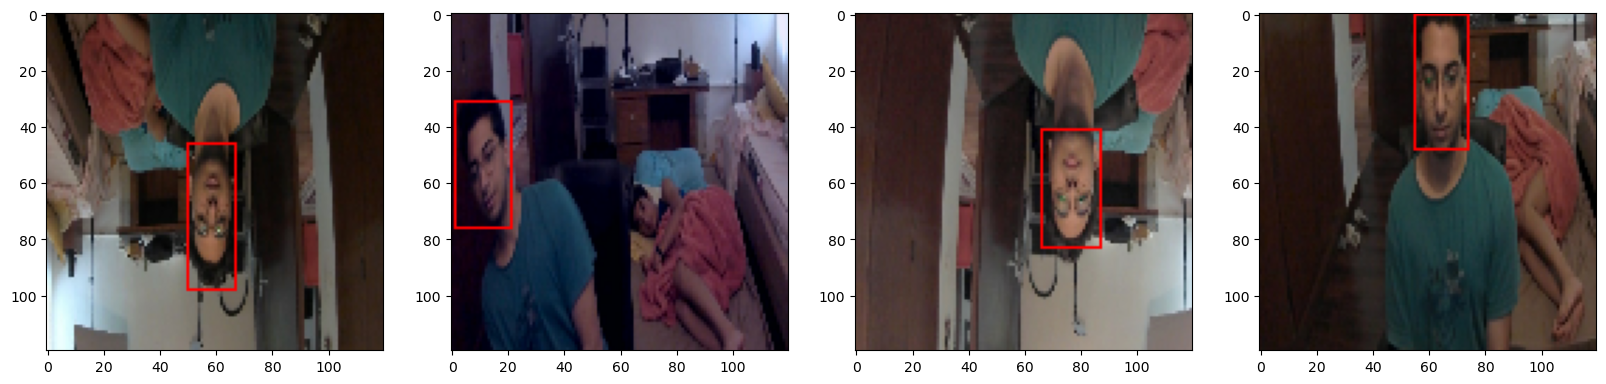

In [23]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4):
    sample_image = res[0][idx].copy() 
    sample_coords = res[1][1][idx]
    # print(sample_image.shape)
    # print(sample_coords.shape)
    # Draw the rectangle on the image
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)), 
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 1)
    
    # Display the image
    ax[idx].imshow(sample_image)

plt.show()


## 8. Build Deep Learning Model (Functional API)

#### 8.1 Import Packages

In [24]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

#### 8.2 Download VGG16

In [30]:
vgg = VGG16(include_top = False)

58889256/58889256 [==============================] - 65s 1us/step


In [31]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

#### 8.3 Build instance of Network

In [32]:
def build_model():
    input_layer = Input(shape = (120, 120, 3))

    vgg = VGG16(include_top = False)(input_layer)

    #Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation = 'relu')(f1)
    class2 = Dense(1, activation = 'sigmoid')(class1)

    #Bounding box Model
    f2 = GlobalMaxPooling2D()(vgg)
    reg1 = Dense(2048, activation = 'relu')(f2)
    reg2 = Dense(4, activation = 'sigmoid')(reg1)

    #Combine it all together by using model api
    faceRec = Model(inputs = input_layer, outputs = [class2, reg2])
    return faceRec

#### 8.4 Test out Neural Network

In [33]:
faceRec = build_model()

In [34]:
faceRec.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [35]:
X, y = train.as_numpy_iterator().next()

In [41]:
print(f'Shape of X(train) : {X.shape}')
print(f'Shape of y(train) Label : {y[0].shape}')
print(f'Shape of y(train) Box Cordinate : {y[1].shape}')

Shape of X(train) : (8, 120, 120, 3)
Shape of y(train) Label : (8, 1)
Shape of y(train) Box Cordinate : (8, 4)


In [42]:
#Using prediction befor train the model
classes , coords = faceRec.predict(X)

1/1 [==============================] - 0s 292ms/step


In [45]:
print(f'Class Prediction Shape : {classes.shape}')
print(f'Coords Prediction Shape : {coords.shape}')

Class Prediction Shape : (8, 1)
Coords Prediction Shape : (8, 4)


In [50]:
print(f'Label For First Image : \n{classes[0]}\n')
print(f'Coords For First Image : \n{coords[0]}')

Label For First Image : 
[0.4583132]

Coords For First Image : 
[0.60478836 0.6026001  0.35393894 0.6485274 ]


## 9. Define Losses and Optimizers

#### 9.1 Define Optimizer and LR

In [51]:
batches_per_epoch = len(train)
lr_decay = (1. / 0.75 - 1) / batches_per_epoch

In [52]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay = lr_decay)

#### 9.2 Create Localization Loss and Classification Loss

In [53]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [54]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

## 10. Train Neural Network

#### 10.1 Create Custom Model Class

In [56]:
class FaceRec(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [57]:
model = FaceRec(faceRec)

In [58]:
model.compile(opt, classloss, regressloss)

#### 10.2 Train

In [59]:
logdir='logs'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 190s 393ms/step - total_loss: 0.4108 - class_loss: 0.1314 - regress_loss: 0.3451 - val_total_loss: 0.0990 - val_class_loss: 0.0191 - val_regress_loss: 0.0894
Epoch 2/10
473/473 [==============================] - 190s 398ms/step - total_loss: 0.0950 - class_loss: 0.0240 - regress_loss: 0.0830 - val_total_loss: 0.0817 - val_class_loss: 0.0128 - val_regress_loss: 0.0753
Epoch 3/10
473/473 [==============================] - 191s 401ms/step - total_loss: 0.0639 - class_loss: 0.0153 - regress_loss: 0.0563 - val_total_loss: 0.0780 - val_class_loss: 0.0050 - val_regress_loss: 0.0754
Epoch 4/10
473/473 [==============================] - 190s 399ms/step - total_loss: 0.0428 - class_loss: 0.0094 - regress_loss: 0.0381 - val_total_loss: 0.0310 - val_class_loss: 1.8195e-05 - val_regress_loss: 0.0309
Epoch 5/10
473/473 [==============================] - 191s 400ms/step - total_loss: 0.0227 - class_loss: 0.0032 - regress_loss: 0.0211 - val_total_l

#### 10.3 Plot Performance

In [63]:
hist.history

{'total_loss': [0.042140454053878784,
  0.028155062347650528,
  0.01221494097262621,
  0.005783597007393837,
  0.004291906021535397,
  0.0051405238918960094,
  0.008844638243317604,
  0.002310526790097356,
  0.002266721334308386,
  0.0005179402651265264],
 'class_loss': [0.0008201296441257,
  0.0005673216073773801,
  8.881185749487486e-06,
  1.1161067050124984e-05,
  1.3992410458740778e-05,
  9.939201845554635e-06,
  8.969056943897158e-05,
  1.057983467944723e-06,
  7.242007086460944e-06,
  9.356371447211131e-05],
 'regress_loss': [0.04173038899898529,
  0.027871401980519295,
  0.012210500426590443,
  0.005778016522526741,
  0.004284909926354885,
  0.005135554354637861,
  0.00879979319870472,
  0.0023099977988749743,
  0.002263100352138281,
  0.0004711584188044071],
 'val_total_loss': [0.09896335750818253,
  0.08173874020576477,
  0.07795372605323792,
  0.030952882021665573,
  0.018427764996886253,
  0.0762370228767395,
  0.20201948285102844,
  0.047406237572431564,
  0.085415944457054

NameError: name 'hist' is not defined

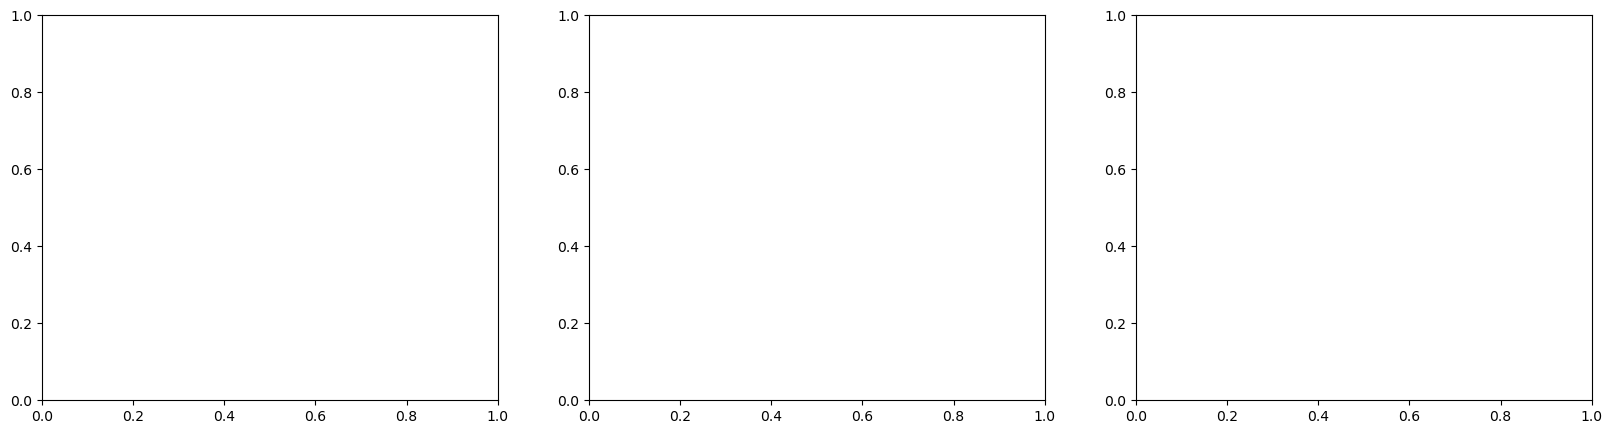

In [25]:
fig, ax = plt.subplots(ncols = 3, figsize = (20, 5))

ax[0].plot(hist.history['total_loss'], color = 'teal', label = 'Train Loss')
ax[0].plot(hist.history['val_total_loss'], color = 'orange', label = 'Validation Loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color = 'teal', label = 'Train Loss')
ax[1].plot(hist.history['val_class_loss'], color = 'orange', label = 'Validation Loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color = 'teal', label = 'Train Loss')
ax[2].plot(hist.history['val_regress_loss'], color = 'orange', label = 'Validation Loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

## 11. Make Predictions

#### 11.1 Make Predictions on Test Set

In [33]:
test_Data = test.as_numpy_iterator()

In [34]:
test_sample = test_Data.next()

In [35]:
yhat = faceRec.predict(test_sample[0]) #X

1/1 [==============================] - 0s 282ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


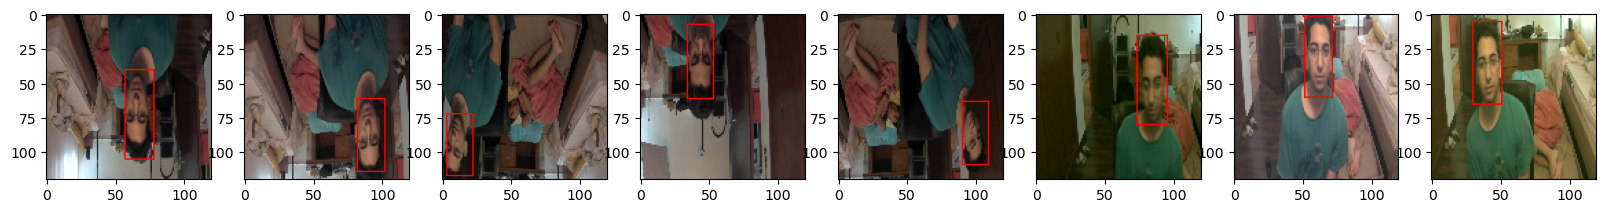

In [36]:
fig, ax = plt.subplots(ncols = 8, figsize = (20,20))
for idx in range(8): 
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 1)
    
    ax[idx].imshow(sample_image)

#### 11.2 Save the Model

In [2]:
from tensorflow.keras.models import load_model

In [31]:
faceRec.save('faceRec.h5')

NameError: name 'faceRec' is not defined

In [3]:
#if you want to load model in diffrent apps
facetracker = load_model('faceRec.h5')

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 60:1000, :]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [940,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [940,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [940,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [940,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [940,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 51ms/step
